# 03_feature_engineering - Simple Feature Creation

This notebook applies simple feature engineering: log-transform of amount, extract hour/weekday from timestamps (if present), and compute simple per-account aggregates (total incoming/outgoing, counts). Each operation is placed in its own cell for clarity.

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..','src')))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engineering import apply_feature_engineering

RAW = os.path.abspath(os.path.join('..','data','raw'))
PROCESSED = os.path.abspath(os.path.join('..','data','processed'))

csvs = [f for f in os.listdir(PROCESSED) if f.lower().endswith('.csv')] if os.path.exists(PROCESSED) else []
print('Processed CSVs found:', csvs)


C:\Users\mazen\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


Processed CSVs found: ['cleaned.csv', 'features.csv']


In [2]:
# Load cleaned data if available, otherwise load first raw CSV
cleaned_path = os.path.join(PROCESSED, 'cleaned.csv')
if os.path.exists(cleaned_path):
    df = pd.read_csv(cleaned_path)
    print('Loaded cleaned:', cleaned_path)
else:
    raw_csvs = [f for f in os.listdir(RAW) if f.lower().endswith('.csv')] if os.path.exists(RAW) else []
    if not raw_csvs:
        print('No CSVs found in data/raw. Please add dataset.')
    else:
        df = pd.read_csv(os.path.join(RAW, raw_csvs[0]))
        print('Loaded raw:', raw_csvs[0])


Loaded cleaned: c:\Users\mazen\Desktop\Uni\Term 9\Data Mining\Anti-Money Laundering (AML) Detection System\aml_project\data\processed\cleaned.csv


In [3]:
# Show first rows
try:
    display(df.head())
except NameError:
    print('No dataframe loaded.')


,Time,Date,Sender_account,Receiver_account,Amount,Is_laundering,Laundering_type,timestamp,Payment_currency_Albanian lek,Payment_currency_Dirham,...,Receiver_bank_location_UAE,Receiver_bank_location_UK,Receiver_bank_location_USA,Payment_type_ACH,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,Payment_type_Cheque,Payment_type_Credit card,Payment_type_Cross-border,Payment_type_Debit card
0,38119,0,8724731955,2769355426,1459.15,0,11,2022-10-07 10:35:19,False,False,...,False,True,False,False,True,False,False,False,False,False
1,38120,0,1491989064,8401255335,6019.64,0,14,2022-10-07 10:35:20,False,False,...,True,False,False,False,False,False,False,False,True,False
2,38120,0,287305149,4404767002,14328.44,0,20,2022-10-07 10:35:20,False,False,...,False,True,False,False,False,False,True,False,False,False
3,38121,0,5376652437,9600420220,11895.00,0,13,2022-10-07 10:35:21,False,False,...,False,True,False,True,False,False,False,False,False,False
4,38121,0,9614186178,3803336972,115.25,0,11,2022-10-07 10:35:21,False,False,...,False,True,False,False,True,False,False,False,False,False


In [4]:
# Apply feature engineering and save features
from feature_engineering import apply_feature_engineering, save_features

print('Before shape:', df.shape)
features = apply_feature_engineering(df, save_path=os.path.join(PROCESSED,'features.csv'))
print('After shape:', features.shape)


Before shape: (9504852, 77)
After shape: (9504852, 85)


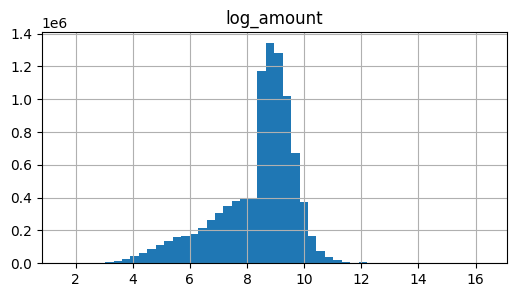

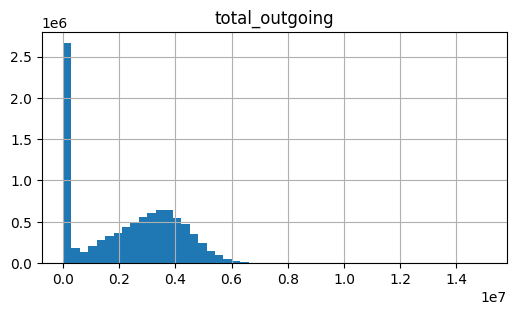

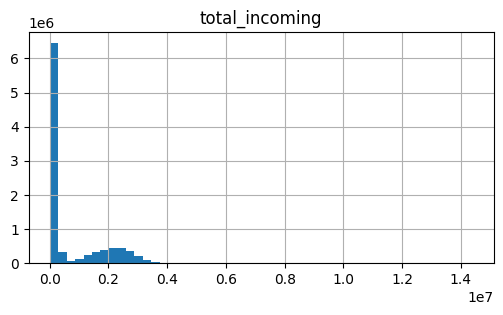

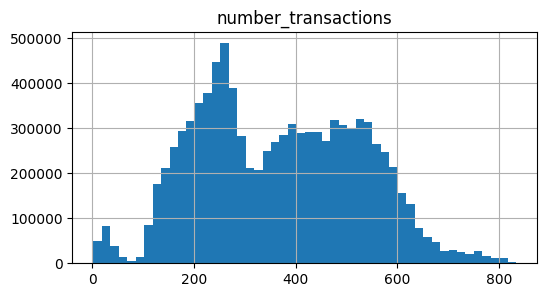

In [5]:
# Histograms of new features: log_amount, total_outgoing, total_incoming, number_transactions
import matplotlib.pyplot as plt

if 'log_amount' in features.columns:
    plt.figure(figsize=(6,3))
    features['log_amount'].hist(bins=50)
    plt.title('log_amount')
    plt.show()

for col in ['total_outgoing','total_incoming','number_transactions']:
    if col in features.columns:
        plt.figure(figsize=(6,3))
        features[col].hist(bins=50)
        plt.title(col)
        plt.show()
